In [14]:
import pandas as pd

# Veri oku
df = pd.read_csv("imdb_analysis/imdb_top_1000.csv")

# İlk 5 satırı görüntüle
df.head()

# Veri seti hakkında genel bilgi
df.info()

# Eksik veri kontrolü
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 74.3+ KB


Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [15]:
# IMDb puanına göre sıralama ve en yüksek 10 filmi alma
top_10_movies = df[['Series_Title', 'IMDB_Rating']].sort_values(by='IMDB_Rating', ascending=False).head(10)
top_10_movies

,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
4,12 Angry Men,9.0
5,The Lord of the Rings: The Return of the King,8.9
6,Pulp Fiction,8.9
7,Schindler's List,8.9
10,The Lord of the Rings: The Fellowship of the Ring,8.8
11,Forrest Gump,8.8


Matplotlib is building the font cache; this may take a moment.


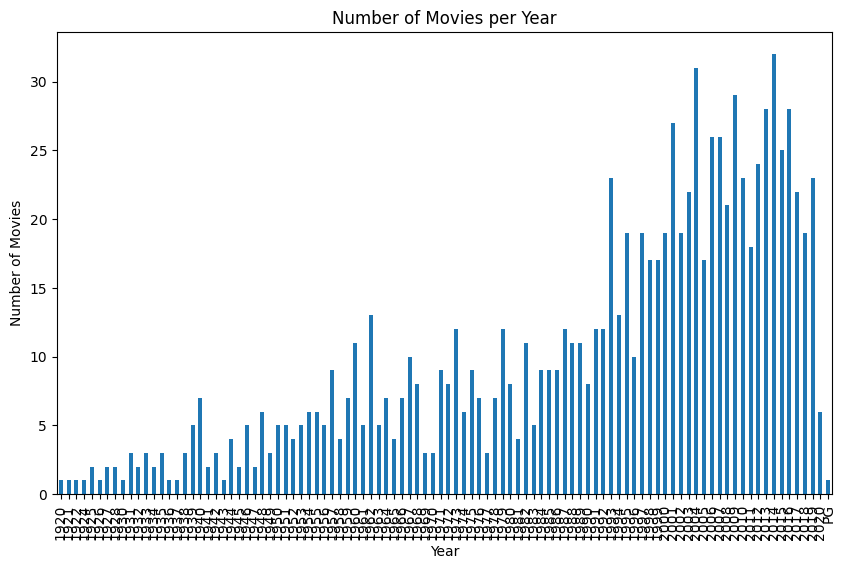

In [16]:
# Yıl bazında film sayısını hesapla
year_count = df['Released_Year'].value_counts().sort_index()

# Sonuçları görselleştirme
import matplotlib.pyplot as plt

year_count.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


In [17]:
# Yönetmenler ve film sayıları
director_count = df['Director'].value_counts().head(1)
director_count

Director
Alfred Hitchcock    14
Name: count, dtype: int64

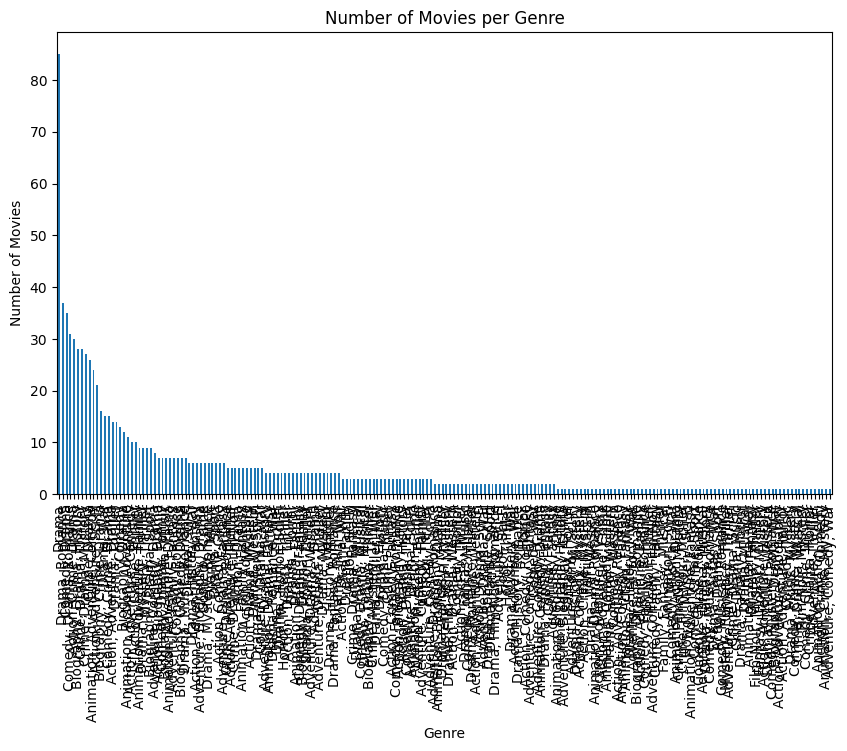

In [22]:
# Tür bazında film sayısını hesapla
genre_count = df['Genre'].value_counts()

# Sonuçları görselleştirme
genre_count.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()


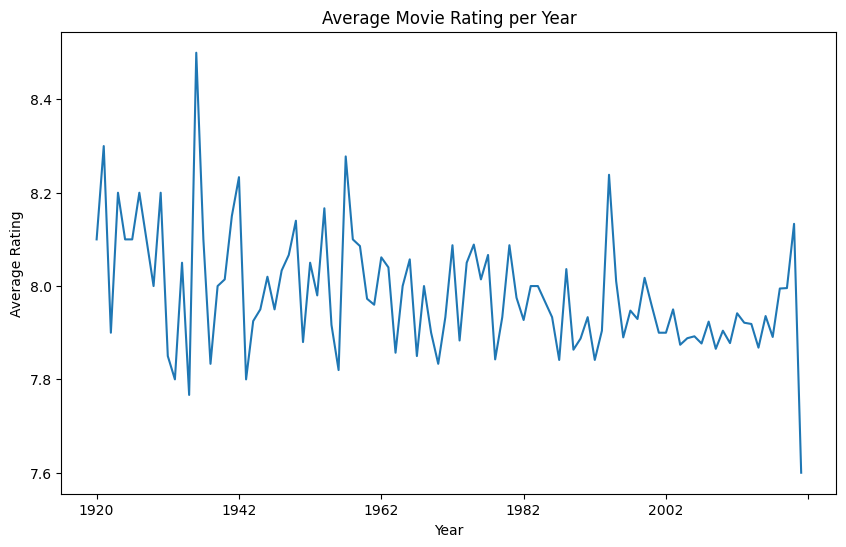

In [23]:
# Yıl bazında ortalama puan hesapla
average_rating_per_year = df.groupby('Released_Year')['IMDB_Rating'].mean()

# Sonuçları görselleştirme
average_rating_per_year.plot(kind='line', figsize=(10, 6))
plt.title('Average Movie Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


In [24]:
df['Director'].value_counts().head(1)

Director
Alfred Hitchcock    14
Name: count, dtype: int64

<Axes: xlabel='Genre'>

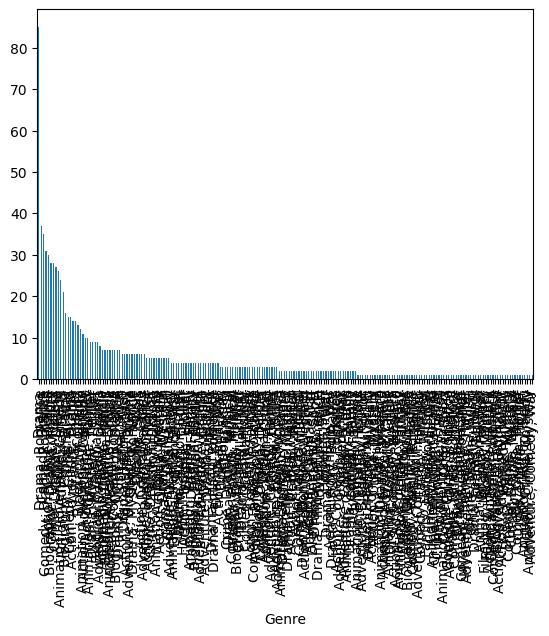

In [25]:
df['Genre'].value_counts().plot(kind='bar')

In [26]:
from IPython.display import Image, display

# En yüksek puanlı 5 filmi seç
top_movies = df.sort_values(by='IMDB_Rating', ascending=False).head(5)

# Her biri için posteri göster
for i, row in top_movies.iterrows():
    print(f"{row['Series_Title']} ({row['Released_Year']}) - Rating: {row['IMDB_Rating']}")
    display(Image(url=row['Poster_Link'], width=200))


The Shawshank Redemption (1994) - Rating: 9.3


The Godfather (1972) - Rating: 9.2


The Dark Knight (2008) - Rating: 9.0


The Godfather: Part II (1974) - Rating: 9.0


12 Angry Men (1957) - Rating: 9.0
